## Q1.
Load the IMDB movies file.

1.   Draw a scatterplot of Ratings (x axis) and Metascore (y axis).
2.   What kind of correlation do you see?
3.   What's the pearson correlation coefficient between these two variables?  

PearsonRResult(statistic=0.7507349262810055, pvalue=6.721638887541394e-182)

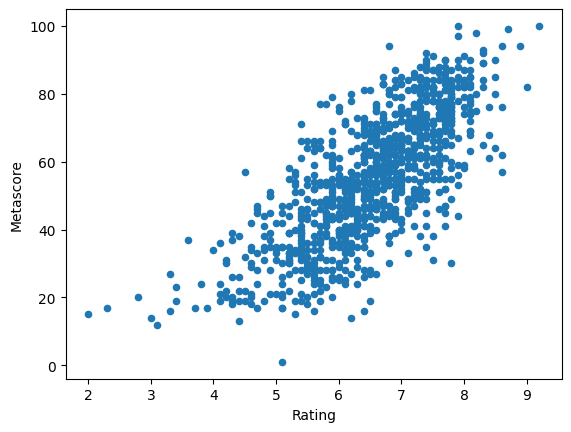

In [ ]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('IMDB_top_10000_cleaned_08252016 (2).csv')


df = df.dropna(subset=['Rating', 'Metascore'])

df.sample(1000).plot.scatter(x='Rating', y='Metascore')

sample = df.sample(1000)
stats.pearsonr(sample['Rating'], sample['Metascore'])


## Q2. 


1.   Create a Linear Regression model with these two variables.
2.   What's the $R^2$ value?
3.   What's the equation of the model?
4.   What's the value of $b_0$ (intercept) and $b_1$ (slope)?
5.   Is the correlation coefficient statistically significant? What are the confidence intervals?




                            OLS Regression Results                            
Dep. Variable:              Metascore   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     6717.
Date:                Sat, 26 Oct 2024   Prob (F-statistic):               0.00
Time:                        00:32:54   Log-Likelihood:                -22337.
No. Observations:                5693   AIC:                         4.468e+04
Df Residuals:                    5691   BIC:                         4.469e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -31.8830      1.082    -29.474      0.0

<ipython-input-13-90910356daaa>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(df['Rating'], results.params[0] + results.params[1] * df['Rating'], color='red')


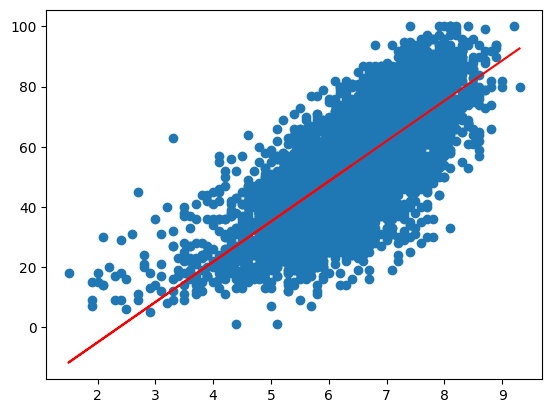

In [ ]:
import statsmodels.api as sm

df['intercept'] = 1
X = df[['intercept', 'Rating']]
y = df.Metascore
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

plt.scatter(df['Rating'], df['Metascore'])

plt.plot(df['Rating'], results.params[0] + results.params[1] * df['Rating'], color='red')


#2. What's the  R2  value? 0.541
#3.What's the equation of the model? Metascore = −31.8830+13.3961×Rating
#4.What's the value of  𝑏0  (intercept) and  𝑏1  (slope)? b0 = −31.8830 b1= 13.3961
#5.Is the correlation coefficient statistically significant? Yes
#What are the confidence intervals? [-34.004, -29.762]

## Q3.

1.   Determine 25 (Q1), 50 (Q2), 75 (Q3) percentiles of Ratings and Metascore columns.
2.   The interquartile range (IQR) method defines outliers as values larger than Q3 + 1.5 * (Q3 - Q1) or the values smaller than Q1 – 1.5 * (Q3 - Q1). Determine the number of outliers in the Ratings column. Determine the number of outliers in the Metascore column.
3.   Repeat **Q2** with the outlier removed data.





Rating quartiles: 0.25    6.00
0.50    6.70
0.75    7.25
Name: Rating, dtype: float64
Metascore quartiles: 0.25    43.0
0.50    56.0
0.75    69.0
Name: Metascore, dtype: float64
Rating outliers: 111
Metascore outliers: 2
                            OLS Regression Results                            
Dep. Variable:              Metascore   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     5443.
Date:                Sat, 26 Oct 2024   Prob (F-statistic):               0.00
Time:                        01:36:28   Log-Likelihood:                -19599.
No. Observations:                5018   AIC:                         3.920e+04
Df Residuals:                    5016   BIC:                         3.921e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                               

<ipython-input-39-fe14a008ba79>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNoOutliers['intercept'] = 1
<ipython-input-39-fe14a008ba79>:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(dfNoOutliers['Rating'], resultsNoOutliers.params[0] + resultsNoOutliers.params[1] * dfNoOutliers['Rating'], color='red', label='Regression Line without Outliers')


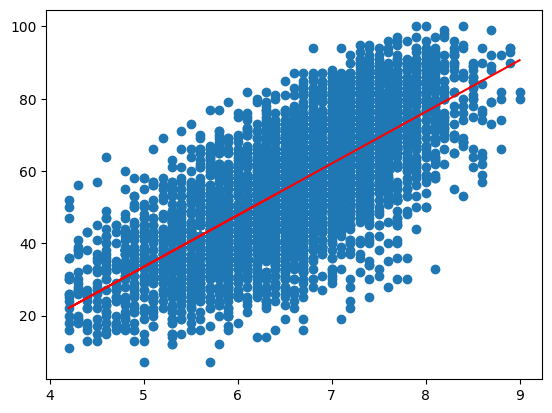

In [ ]:

ratingQuartile1 = df['Rating'].quantile([0.25, 0.5, 0.75])
metascoreQuartile1 = df['Metascore'].quantile([0.25, 0.5, 0.75])

print("Rating quartiles:", ratingQuartile1)
print("Metascore quartiles:", metascoreQuartile1)

ratingIqr = ratingQuartile1[0.75] - ratingQuartile1[0.25]
ratingUpperLimit = ratingQuartile1[0.75]+1.5*ratingIqr
ratingLowerLimit = ratingQuartile1[0.25]-1.5*ratingIqrx

metascoreIqr = metascoreQuartile1[0.75] - metascoreQuartile1[0.25]
metascoreUpperLimit = metascoreQuartile1[0.75]+1.5*metascoreIqr
metascoreLowerLimit = metascoreQuartile1[0.25]-1.5*metascoreIqr

ratingOutliers = df[(df['Rating'] > ratingUpperLimit) | (df['Rating'] < ratingLowerLimit)]
metascoreOutliers = df[(df['Metascore'] > metascoreUpperLimit) | (df['Metascore'] < metascoreLowerLimit)]

print("Rating outliers:", len(ratingOutliers))
print("Metascore outliers:", len(metascoreOutliers))

dfNoOutliers = df[(df['Rating'] <= ratingUpperLimit) & (df['Rating'] >= ratingLowerLimit) &
                   (df['Metascore'] <= metascoreUpperLimit) & (df['Metascore'] >= metascoreLowerLimit)]

dfNoOutliers['intercept'] = 1
XNoOutliers = dfNoOutliers[['intercept', 'Rating']]
yNoOutliers = dfNoOutliers.Metascore
modelNoOutliers = sm.OLS(yNoOutliers, XNoOutliers)
resultsNoOutliers = modelNoOutliers.fit()

print(resultsNoOutliers.summary())

plt.scatter(dfNoOutliers['Rating'], dfNoOutliers['Metascore'], label='No Outliers Data')
plt.plot(dfNoOutliers['Rating'], resultsNoOutliers.params[0] + resultsNoOutliers.params[1] * dfNoOutliers['Rating'], color='red', label='Regression Line without Outliers')
plt.show()

#1 R2 value: 0.523
#2 Equation of the model: Metascore = -38.2950 + 14.3353 * Rating
#3 Intercept b0= -38.2950 b1 = 14.3353
#4 Is the correlation coefficient statistically significant? Yes
#5 Confidence intervals:[-34.004, -29.762]


## Q4. 


Repeat **Q2** for Gross (x axis) and Metascore (y axis).




In [ ]:
df = df.dropna(subset=['Gross', 'Metascore'])  # Drop rows with missing values
df['intercept'] = 1  # Add intercept column
X = df[['intercept', 'Gross']]
y = df['Metascore']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

plt.scatter(df['Gross'], df['Metascore'])
plt.plot(df['Gross'], results.params[0] + results.params[1] * df['Gross'], color='red')
plt.xlabel('Gross')
plt.ylabel('Metascore')
plt.show()


#2. What's the  𝑅2  value? .006
#3.What's the equation of the model? Metascore = 55.1111+2.142e-08×Gross
#4.What's the value of  𝑏0  (intercept) and  𝑏1  (slope)? b0 = 55.1111  b1 = 2.142e-08
#5.Is the correlation coefficient statistically significant? Yes
#What are the confidence intervals? [54.536, 55.686] [1.39e-08, 2.89e-08]


: 